In [65]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline


In [43]:
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')


In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [46]:
df.shape

(541909, 8)

In [47]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [48]:
df['InvoiceYearMonth']=df['InvoiceDate'].map(lambda date:100*date.year+date.month)
df['Revenue']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [49]:
df_revenue=df.groupby(['InvoiceYearMonth']).agg({'Revenue':sum}).reset_index()
df_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121


In [50]:
import seaborn as sns

<Axes: >

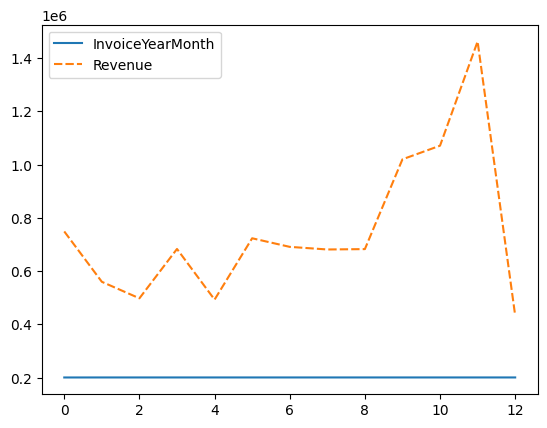

In [51]:
sns.lineplot(data=df_revenue)

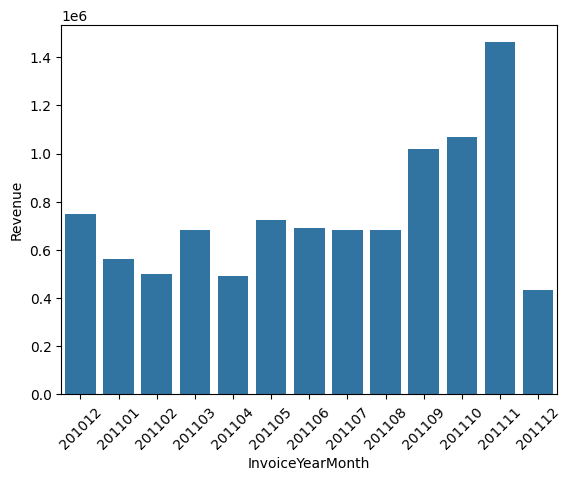

In [52]:
sns.barplot(data=df_revenue,x='InvoiceYearMonth',y='Revenue')
plt.xticks(rotation=45)
plt.show()

In [53]:
df.isna().sum()

InvoiceNo                0
StockCode                0
Description           1454
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
InvoiceYearMonth         0
Revenue                  0
dtype: int64

In [54]:
df.dropna(inplace=True)

In [55]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
InvoiceYearMonth    0
Revenue             0
dtype: int64

In [56]:
df.shape

(406829, 10)

In [57]:
df['Month']=df['InvoiceDate'].dt.month

In [58]:
df['Day']=df['InvoiceDate'].dt.day_name()

In [59]:
duplicate_rows=df.duplicated()
duplicate_rows.sum()
if True in duplicate_rows:
  df=df[~duplicate_rows]

In [60]:
df_revenue['MonthlyGrowth']=df_revenue['Revenue'].pct_change()

In [61]:
df['Country'].nunique()

37

In [62]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [63]:
df_USA=df[df['Country']=='USA']
df_USA

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,Month,Day
164464,550644,22722,SET OF 6 SPICE TINS PANTRY DESIGN,7,2011-04-19 16:19:00,3.95,12733.0,USA,201104,27.65,4,Tuesday
164465,550644,22979,PANTRY WASHING UP BRUSH,2,2011-04-19 16:19:00,1.45,12733.0,USA,201104,2.90,4,Tuesday
164466,550644,84987,SET OF 36 TEATIME PAPER DOILIES,3,2011-04-19 16:19:00,1.45,12733.0,USA,201104,4.35,4,Tuesday
164467,550644,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,2011-04-19 16:19:00,4.95,12733.0,USA,201104,4.95,4,Tuesday
164468,550644,22993,SET OF 4 PANTRY JELLY MOULDS,1,2011-04-19 16:19:00,1.25,12733.0,USA,201104,1.25,4,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
536922,C581229,23158,SET OF 5 LUCKY CAT MAGNETS,-36,2011-12-08 10:14:00,2.08,12558.0,USA,201112,-74.88,12,Thursday
536923,C581229,22712,CARD DOLLY GIRL,-12,2011-12-08 10:14:00,0.42,12558.0,USA,201112,-5.04,12,Thursday
536924,C581229,22027,TEA PARTY BIRTHDAY CARD,-12,2011-12-08 10:14:00,0.42,12558.0,USA,201112,-5.04,12,Thursday
536925,C581229,21508,VINTAGE KID DOLLY CARD,-12,2011-12-08 10:14:00,0.42,12558.0,USA,201112,-5.04,12,Thursday


In [64]:
df_MOQ=df.groupby('InvoiceYearMonth')['Quantity'].sum()
df_MOQ

InvoiceYearMonth
201012    296362
201101    269379
201102    262833
201103    344012
201104    278585
201105    367852
201106    356922
201107    363418
201108    386612
201109    537496
201110    569666
201111    669915
201112    203836
Name: Quantity, dtype: int64